# Modeling

___

### 1. Import Libraries

In [124]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler

___

### 2. Expand maximum range of rows

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

___

### 3. Load Data

In [8]:
paleo = pd.read_csv('../Data/scaled_paleo.csv', index_col=0)
primal = pd.read_csv('../Data/scaled_primal.csv', index_col=0) 
vegan = pd.read_csv('../Data/scaled_vegan.csv', index_col=0) 
vegetarian = pd.read_csv('../Data/scaled_vegetarian.csv', index_col=0) 
whole30 = pd.read_csv('../Data/scaled_whole30.csv', index_col=0)

___

# Vegetarian Data

### 4. Train / Test Split Data

For train/test splits, as your dataset gets bigger and bigger, the split can lean more and more towards the "train" set. As your dataset gets really small (100 observations) then the split should be closer to 50/50 for train/test.

In [217]:
x_variables_1 = ['num_ingredients', 
              'pricePerServing', 
              'readyInMinutes', 
              'servings', 
              'weightWatcherSmartPoints', 
              'Calories', 
              'Fat', 
              'Saturated_Fat', 
              'Carbohydrates', 
              'Sugar', 
              'Cholesterol', 
              'Sodium', 
              'Protein', 
              'Vitamin_K', 
              'Vitamin_A', 
              'Vitamin_C', 
              'Manganese', 
              'Folate', 
              'Fiber', 
              'Copper', 
              'Magnesium', 
              'Phosphorus', 
              'Vitamin_B6', 
              'Potassium', 
              'Vitamin_B1', 
              'Iron', 
              'Vitamin_B2', 
              'Vitamin_E', 
              'Zinc', 
              'Vitamin_B5', 
              'Vitamin_B3', 
              'Calcium', 
              'Selenium', 
              'num_words_instructions', 
              'num_steps_instructions']

In [218]:
predictors = vegetarian[x_variables_1]

In [219]:
target = vegetarian['aggregateLikes']

In [220]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, random_state = 2020, test_size = .25) 

___

### 5. Run Regression 1, Fit, & Cull Non-Significant Predictors

### Lasso Model

In [221]:
lasso = Lasso(alpha = 0.05, max_iter=10000)
lasso.fit(x_train, y_train)
# sample_models['lasso'] = lasso
# y_lasso_test.append(lasso.score(X_test, y_test))

lasso_coefficients = dict(zip(x_variables, list(lasso.coef_)))
display('lasso coefficients')
display(lasso_coefficients)

display('lasso train score')
display(lasso.score(x_train, y_train))

display('lasso test score')
display(lasso.score(x_test, y_test))

'lasso coefficients'

{'num_ingredients': 1240.9133125586823,
 'pricePerServing': -2533.0038844699166,
 'readyInMinutes': 2434.5534980351204,
 'servings': -2172.590588482734,
 'weightWatcherSmartPoints': -843.5871563924436,
 'Calories': 11207.865193283511,
 'Fat': -6382.230980570306,
 'Saturated_Fat': 659.8204266369121,
 'Carbohydrates': -4272.0811767686655,
 'Sugar': -809.2410316657312,
 'Cholesterol': -16457.743765278345,
 'Sodium': 6606.070685835637,
 'Protein': -16549.883354941678,
 'Vitamin_K': -2259.213072517756,
 'Vitamin_A': -886.6298658146507,
 'Vitamin_C': -68.71662531591203,
 'Manganese': 1059.1422211657264,
 'Folate': -89.33683721275408,
 'Fiber': -5615.285704597482,
 'Copper': -997.1899871878235,
 'Magnesium': -2798.534031543237,
 'Phosphorus': 7814.864139686285,
 'Vitamin_B6': -4130.3910670480645,
 'Potassium': 186.5103328344698,
 'Vitamin_B1': -2815.809204030713,
 'Iron': -218.7277455673183,
 'Vitamin_B2': 11999.609553021453,
 'Vitamin_E': -1135.4826857550515,
 'Zinc': 4803.227903891544,
 'Vi

'lasso train score'

0.17291249919541962

'lasso test score'

-0.15835830638917292

### Ridge Model

In [222]:
ridge = Ridge(alpha = .05, max_iter= 10000)
ridge.fit(x_train, y_train)

ridge_coefficients = dict(zip(x_variables, list(ridge.coef_)))
display('ridge coefficients')
display(ridge_coefficients)

display('lasso train score')
display(ridge.score(x_train, y_train))

display('lasso test score')
display(ridge.score(x_test, y_test))

'ridge coefficients'

{'num_ingredients': 1242.309503283804,
 'pricePerServing': -2520.2868464559915,
 'readyInMinutes': 2433.797868283072,
 'servings': -2167.258099866938,
 'weightWatcherSmartPoints': -705.0584032953681,
 'Calories': 9319.083876260629,
 'Fat': -5310.879364563956,
 'Saturated_Fat': 624.8260679195679,
 'Carbohydrates': -3374.568291123304,
 'Sugar': -821.1179912327268,
 'Cholesterol': -16160.234416287985,
 'Sodium': 6603.495213920859,
 'Protein': -15946.111600228123,
 'Vitamin_K': -2267.89513599419,
 'Vitamin_A': -878.0882235421251,
 'Vitamin_C': -63.05853694677732,
 'Manganese': 1043.1073460913983,
 'Folate': -80.0920649103681,
 'Fiber': -5629.487503564938,
 'Copper': -995.6565154401636,
 'Magnesium': -2812.0265342273683,
 'Phosphorus': 7745.090623415504,
 'Vitamin_B6': -4105.355465624372,
 'Potassium': 162.31543170907298,
 'Vitamin_B1': -2797.5237568405596,
 'Iron': -193.46831818131906,
 'Vitamin_B2': 11993.748221450156,
 'Vitamin_E': -1131.6824158313652,
 'Zinc': 4821.067591660976,
 'Vitam

'lasso train score'

0.1729053185634858

'lasso test score'

-0.1576998163532699

### OLS Model

#### Regression 1 - fit to model, check for p-values less than 0.3

In [223]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
model = sm.OLS(y, x).fit() #assign to the x and y variables with constant to the sm.OLS() function and fit the data
predictions = model.predict(x)#assign the result of the OLS to predict the data
model.summary()#show the summary

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.598
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           3.93e-06
Time:                        16:38:30   Log-Likelihood:                -5403.8
No. Observations:                 471   AIC:                         1.088e+04
Df Residuals:                     435   BIC:                         1.103e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1899.4616   4404.677      0.431      0.667   -6757.634    1.06e+04
num_ingredients           1240.9808   1488.430      0.834      0.405   -1684.429    4166.390
pricePerServing          -2534.0664   2664.038     -0.951      0.342   -7770.053    2701.920
readyInMinutes            2434.6581   1432.080      1.700      0.090    -379.999    5249.315
servings                 -2173.0608   1421.548     -1.529      0.127   -4967.017     620.896
weightWatcherSmartPoints  -853.5684   6456.150     -0.132      0.895   -1.35e+04    1.18e+04
Calories                  1.133e+04   3.44e+04      0.330      0.742   -5.62e+04    7.89e+04
Fat                      -6450.2818   1.98e+04     -0.326      0.744   -4.53e+04    3.24e+04
Saturated_Fat              661.8762   2363.526      0.280      0.780   -3983.475    5307.228
Carbohydrates            -4329.5485   1.69e+04     -0.256      0.798   -3.75e+04    2.89e+04
Sugar                     -808.5016   1992.874     -0.406      0.685   -4725.362    3108.358
Cholesterol              -1.647e+04   1.12e+04     -1.475      0.141   -3.84e+04    5481.580
Sodium                    6606.1902   1321.048      5.001      0.000    4009.759    9202.622
Protein                  -1.659e+04   1.15e+04     -1.440      0.151   -3.92e+04    6049.687
Vitamin_K                -2258.5241   1681.420     -1.343      0.180   -5563.242    1046.194
Vitamin_A                 -887.1487   1269.095     -0.699      0.485   -3381.469    1607.172
Vitamin_C                  -69.1657   1714.269     -0.040      0.968   -3438.446    3300.115
Manganese                 1060.3634   2013.020      0.527      0.599   -2896.091    5016.817
Folate                     -89.9394   2248.162     -0.040      0.968   -4508.549    4328.671
Fiber                    -5614.5450   2960.986     -1.896      0.059   -1.14e+04     205.073
Copper                    -997.3799   1288.200     -0.774      0.439   -3529.250    1534.490
Magnesium                -2797.4663   3189.384     -0.877      0.381   -9065.985    3471.053
Phosphorus                7818.6493   4769.958      1.639      0.102   -1556.382    1.72e+04
Vitamin_B6               -4132.3764   3186.117     -1.297      0.195   -1.04e+04    2129.721
Potassium                  188.3991   2890.608      0.065      0.948   -5492.895    5869.693
Vitamin_B1               -2817.3884   3714.115     -0.759      0.449   -1.01e+04    4482.453
Iron                      -220.5380   2041.372     -0.108      0.914   -4232.716    3791.640
Vitamin_B2                  1.2e+04   3838.364      3.126      0.002    4455.343    1.95e+04
Vitamin_E                -1135.7953   2097.471     -0.542      0.588   -5258.232    2986.641
Zinc                      4802.7104   5091.051      0.943      0.346   -5203.406    1.48e+04
Vitamin_B5    

#### Notes 
It looks like many variables are non-significant predictors for "likes" so we will use a fairly high alpha cutoff (0.3) in our round 1 culling of predictors.

#### Regression 2  - provide updated list of predictors (p < 0.3) and fit to model again, check for p-values less than 0.05

In [224]:
x_train = x_train[[
    'num_ingredients',  
    'readyInMinutes', 
    'servings', 
    'Sodium',
    'Vitamin_K', 
    'Fiber', 
    'Phosphorus', 
    'Vitamin_B1', 
    'Vitamin_B2', 
    'Vitamin_B5', 
    'num_steps_instructions']]

In [225]:
x = x_train 
y = y_train 
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     5.671
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.39e-08
Time:                        16:38:31   Log-Likelihood:                -5418.5
No. Observations:                 471   AIC:                         1.086e+04
Df Residuals:                     459   BIC:                         1.091e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.076e+04   1454.171      7.396      0.000    7897.566    1.36e+04
num_ingredients         1718.2004   1335.307      1.287      0.199    -905.872    4342.273
readyInMinutes          1995.2089   1375.127      1.451      0.147    -707.116    4697.534
servings               -1387.8394   1254.940     -1.106      0.269   -3853.980    1078.302
Sodium                  5486.5802   1159.758      4.731      0.000    3207.487    7765.674
Vitamin_K              -3468.9791   1157.952     -2.996      0.003   -5744.524   -1193.434
Fiber                  -5222.0584   1801.462     -2.899      0.004   -8762.194   -1681.922
Phosphorus               493.1670   2323.284      0.212      0.832   -4072.425    5058.759
Vitamin_B1             -3203.0933   2921.233     -1.096      0.273   -8943.742    2537.555
Vitamin_B2              3215.6180   2459.164      1.308      0.192   -1616.997    8048.233
Vitamin_B5              9226.3803   2953.015      3.124      0.002    3423.275     1.5e+04
num_steps_instructions  -456.7005   1206.012     -0.379      0.705   -2826.689    1913.288
==============================================================================
Omnibus:                      631.672   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71804.116
Skew:                           6.833   Prob(JB):                         0.00
Kurtosis:                      61.924   Cond. No.                         5.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Notes 
Now that we are in round 2, we will use a lower alpha cutoff (0.05) in our culling of predictors.

#### Regression 3 -  provide updated list of predictors (p < .05) and fit to model again, check for p-values less than 0.05 again.

In [226]:
x_train = x_train[[
    'num_ingredients',  
    'Sodium',
    'Vitamin_K', 
    'Fiber', 
    'Vitamin_B5']]

In [227]:
x = x_train 
y = y_train 
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     11.02
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           4.81e-10
Time:                        16:38:32   Log-Likelihood:                -5422.2
No. Observations:                 471   AIC:                         1.086e+04
Df Residuals:                     465   BIC:                         1.088e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.059e+04   1346.792      7.865      0.000    7946.486    1.32e+04
num_ingredients  1183.7529   1181.953      1.002      0.317   -1138.877    3506.383
Sodium           5825.7039   1134.559      5.135      0.000    3596.206    8055.202
Vitamin_K       -3090.3662   1135.136     -2.722      0.007   -5320.997    -859.736
Fiber           -5750.5265   1512.395     -3.802      0.000   -8722.503   -2778.551
Vitamin_B5       1.072e+04   2663.465      4.023      0.000    5481.150    1.59e+04
==============================================================================
Omnibus:                      637.128   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73691.402
Skew:                           6.939   Prob(JB):                         0.00
Kurtosis:                      62.686   Cond. No.                         3.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Notes 
Now that we are in round 3, we will still use a low alpha cutoff (0.05) in our culling of predictors.

#### Run regression with updated list of predictors and fit to model again, check for p-values less than 0.05

In [228]:
x_train = x_train[[  
    'Sodium',
    'Vitamin_K', 
    'Fiber', 
    'Vitamin_B5']]

In [229]:
x = x_train 
y = y_train 
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     13.53
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.94e-10
Time:                        16:38:32   Log-Likelihood:                -5422.7
No. Observations:                 471   AIC:                         1.086e+04
Df Residuals:                     466   BIC:                         1.088e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.054e+04   1345.864      7.834      0.000    7898.151    1.32e+04
Sodium      6053.6953   1111.490      5.446      0.000    3869.542    8237.849
Vitamin_K  -3124.5436   1134.626     -2.754      0.006   -5354.161    -894.926
Fiber      -5502.6165   1492.006     -3.688      0.000   -8434.509   -2570.724
Vitamin_B5  1.069e+04   2663.336      4.013      0.000    5454.288    1.59e+04
==============================================================================
Omnibus:                      639.187   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74645.926
Skew:                           6.977   Prob(JB):                         0.00
Kurtosis:                      63.074   Cond. No.                         3.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___

### 6. Variance Inflation Factor (VIF) check for multicollinearity

#### Now, we will check for multicollinearity between our remaining predictors using Variance Inflation Factor.
We are doing this because cutting more collinearity means you can rely more on your Betas (coefficients) to predict more reliably.

In [230]:
X = vegetarian[x_train.columns]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_train.columns, vif))

[('Sodium', 1.2058539199016247),
 ('Vitamin_K', 1.1027127768555258),
 ('Fiber', 1.6122069024664532),
 ('Vitamin_B5', 1.471937768488792)]

#### Notes
Typically, variables with a VIF of 5 or greater (or more definitively 10 or greater) are displaying multicollinearity with other variables in the feature set. None of our predictors have a VIF greater than 5 or 10, so <b>multicollinearity between our predictors does not seem to be an issue.</b>

The way VIF works is that each variable becomes the target, with all other variables predicting it, and you get an R-Squared for each variable. So for example, if VIF for Sodium is 9, then 9 = 1/(1-R^2). R^2 for Sodium would be = .88.

___

### 7. QQ-Plot check for normally distributed residuals

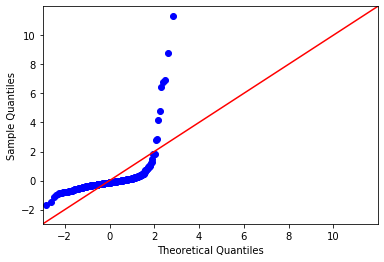

In [231]:
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)

<b>Notes:</b>

A Q-Q plot checks to ensure that our residuals are normally distributed. Theoretically, we would expect all "blue dots" which represents the residuals for our data, to be normally distributed, and would follow the red line in the plot perfectly. However, <b>our sample has a non-normal distribution of residuals</b> because it snakes around the red line, and then takes a sharp turn upwards towards higher sample quantile values of 10+, when theoretically, it should be around 2 or 3 at the same quantile.

___

### 8. Ensure homoscedasticity by checking for heteroscedasticity

#### Check for homoscedacity
Need to check that errors do not display heteroscedasticity; if the errors appear to increase or decrease based on the target variable, then the model does not meet the initial assumptions. Scatterplot of residual quantity on the x-axis against standard deviation on the y-axis.

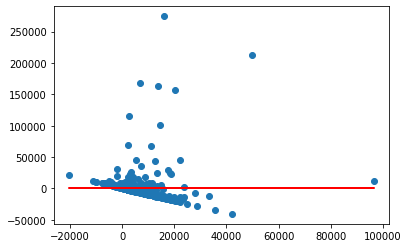

In [232]:
plt.scatter(predictions, results.resid)
plt.plot(predictions, [0 for i in range(len(x_train))], color = 'r')
plt.show()

### 9. Test OLS Model Against Test Data

In [233]:
x_test.shape

(157, 35)

In [234]:
x_test = x_test[[  
    'Sodium',
    'Vitamin_K', 
    'Fiber', 
    'Vitamin_B5']]

In [235]:
x_test = sm.add_constant(x_test)
predictions_test = model.predict(x_test)
predictions_test
# train_score = predictions.score(x_train, y_train)
# test_score = predictions_test.score(x_test, y_test)

262    10431.946363
174     7433.740763
278     5934.744579
999     4750.924961
908     8537.581024
390     3498.236217
372    37947.096234
791     7003.167928
345      164.192315
296     7357.484288
686      490.094210
862      386.874300
232    -6342.997561
586     8056.343829
327     2381.083767
567     7572.313658
168     5271.365578
238     2891.487482
507     1463.837447
993    11175.988457
733    -1063.093740
743     7283.630901
123    10727.460263
306    21888.004590
448      138.659753
828     6628.188783
632      228.696947
700    10650.744310
57      2572.273733
143     2061.541783
84      4042.992700
827    13394.884236
167     4833.180526
749     9958.838707
288    34716.014370
519    18022.404062
873    -2094.896239
741   -18097.619720
861     3530.060211
837     6402.892614
322    10686.069518
78     23572.825362
401     -552.383314
848    22632.862479
693     6965.361446
428     3297.429631
46     13000.461092
119     2309.031926
162    28300.175445
930     3036.231497


#### Graph of OLS Regression Model Against Test Data

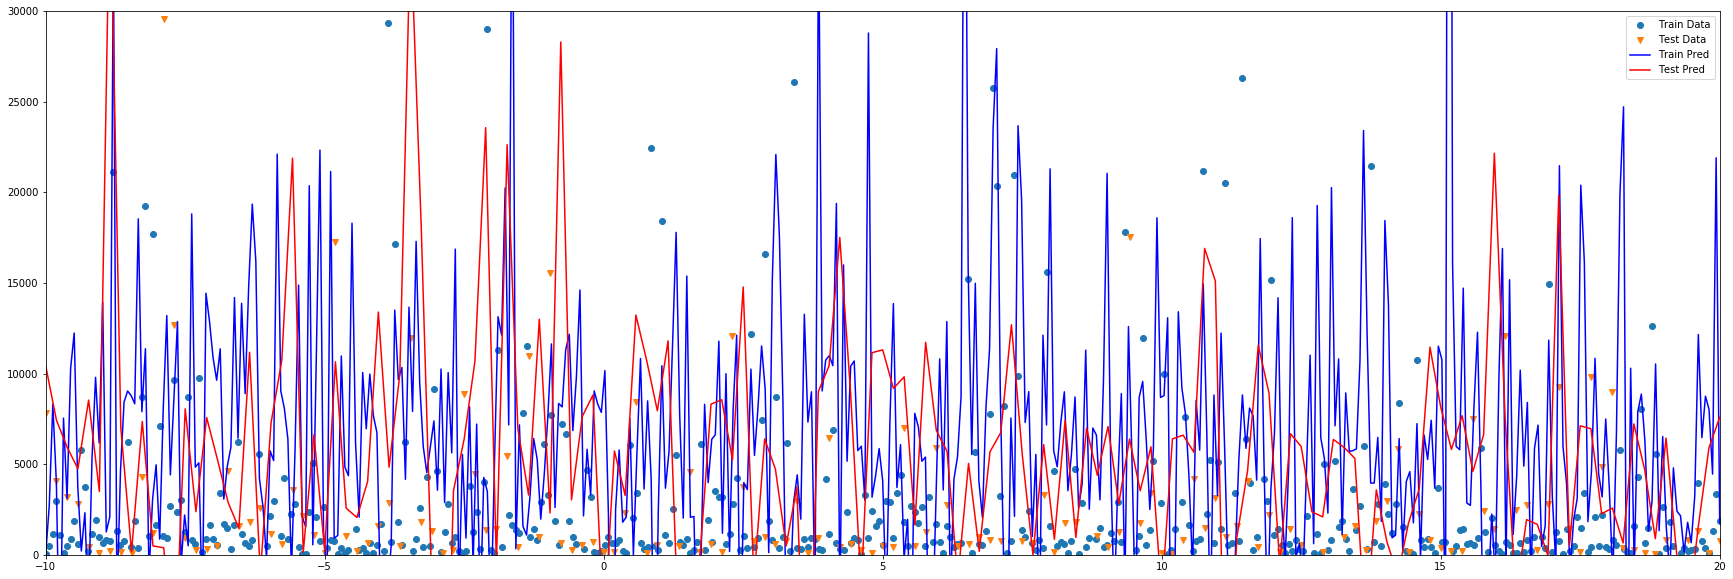

In [236]:
fig, ax = plt.subplots()
fig.set_size_inches(30,10)
x_tr = np.linspace(-10, 20, len(x_train))
x_te = np.linspace(-10, 20, len(x_test))
ax.plot(x_tr, y_train, 'o', label="Train Data")
ax.plot(x_te, y_test, 'v', label="Test Data")
ax.plot(x_tr, predictions, 'b-', label="Train Pred")
ax.plot(x_te, predictions_test, 'r-', label="Test Pred")
plt.axis([-10,20,0,30000])
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

___

# Paleo Data

### 4. Train / Test Split Data

For train/test splits, as your dataset gets bigger and bigger, the split can lean more and more towards the "train" set. As your dataset gets really small (100 observations) then the split should be closer to 50/50 for train/test.

In [237]:
x_variables_1 = ['num_ingredients', 
              'pricePerServing', 
              'readyInMinutes', 
              'servings', 
              'weightWatcherSmartPoints', 
              'Calories', 
              'Fat', 
              'Saturated_Fat', 
              'Carbohydrates', 
              'Sugar', 
              'Cholesterol', 
              'Sodium', 
              'Protein', 
              'Vitamin_K', 
              'Vitamin_A', 
              'Vitamin_C', 
              'Manganese', 
              'Folate', 
              'Fiber', 
              'Copper', 
              'Magnesium', 
              'Phosphorus', 
              'Vitamin_B6', 
              'Potassium', 
              'Vitamin_B1', 
              'Iron', 
              'Vitamin_B2', 
              'Vitamin_E', 
              'Zinc', 
              'Vitamin_B5', 
              'Vitamin_B3', 
              'Calcium', 
              'Selenium', 
              'num_words_instructions', 
              'num_steps_instructions']

In [238]:
predictors_paleo = paleo[x_variables_1]

In [239]:
target = paleo['aggregateLikes']

In [240]:
x_train, x_test, y_train, y_test = train_test_split(predictors_paleo, target, random_state = 2020, test_size = .25) 

___

### 5. Run Regression 1, Fit, & Cull Non-Significant Predictors

### Lasso Model

In [241]:
lasso = Lasso(alpha = 0.05, max_iter=10000)
lasso.fit(x_train, y_train)
# sample_models['lasso'] = lasso
# y_lasso_test.append(lasso.score(X_test, y_test))

lasso_coefficients = dict(zip(x_variables, list(lasso.coef_)))
display('lasso coefficients')
display(lasso_coefficients)

display('lasso train score')
display(lasso.score(x_train, y_train))

display('lasso test score')
display(lasso.score(x_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131997410.45825195, tolerance: 63790534.52389553
  positive)


'lasso coefficients'

{'num_ingredients': -17434.02261293268,
 'pricePerServing': 31101.046890132202,
 'readyInMinutes': -725.8905062096619,
 'servings': 11880.845771364966,
 'weightWatcherSmartPoints': -30866.412963364925,
 'Calories': 48483.83418363307,
 'Fat': 28451.797650468547,
 'Saturated_Fat': -22980.423418021797,
 'Carbohydrates': -24699.45040852878,
 'Sugar': 7475.607106664642,
 'Cholesterol': 31343.157733082597,
 'Sodium': 11452.404628626282,
 'Protein': -8635.180773525663,
 'Vitamin_K': -9038.542084653758,
 'Vitamin_A': -3607.8875297882555,
 'Vitamin_C': -3095.499716964563,
 'Manganese': -10577.17683148077,
 'Folate': -8469.848162139384,
 'Fiber': -4557.990803753685,
 'Copper': -3422.527770544169,
 'Magnesium': 17974.155265060792,
 'Phosphorus': -35197.11832924234,
 'Vitamin_B6': 18963.95395544906,
 'Potassium': -4420.144182074433,
 'Vitamin_B1': 7839.029433481063,
 'Iron': -26203.090403008177,
 'Vitamin_B2': -7970.567227212416,
 'Vitamin_E': -13785.847085277153,
 'Zinc': 9241.29257946245,
 'Vita

'lasso train score'

0.20264263237106783

'lasso test score'

-0.470972503211474

### Ridge Model

In [242]:
ridge = Ridge(alpha = .05, max_iter= 10000)
ridge.fit(x_train, y_train)

ridge_coefficients = dict(zip(x_variables, list(ridge.coef_)))
display('ridge coefficients')
display(ridge_coefficients)

display('ridge train score')
display(ridge.score(x_train, y_train))

display('ridge test score')
display(ridge.score(x_test, y_test))

'ridge coefficients'

{'num_ingredients': -17388.49686981861,
 'pricePerServing': 30743.998363855957,
 'readyInMinutes': -749.0243584373317,
 'servings': 11947.781620336336,
 'weightWatcherSmartPoints': -29758.515411818124,
 'Calories': 34698.13206822384,
 'Fat': 35668.33272285386,
 'Saturated_Fat': -22583.617076972685,
 'Carbohydrates': -18127.404837372134,
 'Sugar': 7328.927562918109,
 'Cholesterol': 30237.038901241503,
 'Sodium': 11378.494870461567,
 'Protein': -3960.036273268489,
 'Vitamin_K': -8717.159335420338,
 'Vitamin_A': -3499.6422928589377,
 'Vitamin_C': -2990.9001679947924,
 'Manganese': -10104.40472631704,
 'Folate': -8497.338782884628,
 'Fiber': -4388.155377354732,
 'Copper': -3359.7714875536585,
 'Magnesium': 17339.852969580166,
 'Phosphorus': -34390.81319194039,
 'Vitamin_B6': 18877.15896791526,
 'Potassium': -4445.351674898595,
 'Vitamin_B1': 8294.653469957326,
 'Iron': -25333.56348024318,
 'Vitamin_B2': -7190.88463759707,
 'Vitamin_E': -13704.063408992906,
 'Zinc': 7980.31378890386,
 'Vita

'lasso train score'

0.20259672912335358

'lasso test score'

-0.4571492414753249

### OLS Model

#### Regression 1 - fit to model, check for p-values less than 0.3

In [243]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
model = sm.OLS(y, x).fit() #assign to the x and y variables with constant to the sm.OLS() function and fit the data
predictions = model.predict(x)#assign the result of the OLS to predict the data
model.summary()#show the summary

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.7116
Date:                Tue, 21 Jan 2020   Prob (F-statistic):              0.873
Time:                        16:40:36   Log-Likelihood:                -1668.0
No. Observations:                 134   AIC:                             3408.
Df Residuals:                      98   BIC:                             3512.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.315e+04   3.54e+04     -0.372      0.711   -8.33e+04     5.7e+04
num_ingredients          -1.743e+04   1.08e+04     -1.616      0.109   -3.88e+04    3980.610
pricePerServing            3.11e+04   1.65e+04      1.887      0.062   -1599.534    6.38e+04
readyInMinutes            -725.7805   6125.739     -0.118      0.906   -1.29e+04    1.14e+04
servings                  1.188e+04   1.36e+04      0.872      0.385   -1.51e+04    3.89e+04
weightWatcherSmartPoints -3.087e+04   4.61e+04     -0.670      0.504   -1.22e+05    6.06e+04
Calories                  4.856e+04    2.4e+05      0.203      0.840   -4.27e+05    5.24e+05
Fat                       2.841e+04   1.49e+05      0.191      0.849   -2.67e+05    3.24e+05
Saturated_Fat            -2.298e+04   2.86e+04     -0.803      0.424   -7.98e+04    3.38e+04
Carbohydrates            -2.474e+04    1.2e+05     -0.207      0.836   -2.62e+05    2.12e+05
Sugar                     7477.1035   2.08e+04      0.360      0.720   -3.38e+04    4.87e+04
Cholesterol               3.135e+04   6.47e+04      0.485      0.629    -9.7e+04     1.6e+05
Sodium                    1.145e+04   1.56e+04      0.736      0.464   -1.94e+04    4.24e+04
Protein                  -8672.1095   1.08e+05     -0.081      0.936   -2.22e+05    2.05e+05
Vitamin_K                -9040.7106   1.19e+04     -0.763      0.448   -3.26e+04    1.45e+04
Vitamin_A                -3608.5797   8850.479     -0.408      0.684   -2.12e+04     1.4e+04
Vitamin_C                -3095.6832    1.7e+04     -0.182      0.856   -3.68e+04    3.06e+04
Manganese                -1.058e+04   1.97e+04     -0.538      0.592   -4.96e+04    2.85e+04
Folate                   -8469.1574   1.73e+04     -0.490      0.625   -4.28e+04    2.58e+04
Fiber                    -4558.2875   2.22e+04     -0.205      0.838   -4.86e+04    3.95e+04
Copper                   -3422.9422   6613.318     -0.518      0.606   -1.65e+04    9700.972
Magnesium                 1.798e+04   3.66e+04      0.491      0.624   -5.47e+04    9.06e+04
Phosphorus                -3.52e+04   5.13e+04     -0.686      0.494   -1.37e+05    6.66e+04
Vitamin_B6                1.897e+04   4.23e+04      0.448      0.655    -6.5e+04    1.03e+05
Potassium                -4421.5507      3e+04     -0.147      0.883   -6.39e+04    5.51e+04
Vitamin_B1                7835.4587   4.11e+04      0.191      0.849   -7.38e+04    8.95e+04
Iron                     -2.621e+04   5.77e+04     -0.455      0.650   -1.41e+05    8.82e+04
Vitamin_B2               -7976.2590   3.06e+04     -0.261      0.795   -6.87e+04    5.27e+04
Vitamin_E                -1.379e+04   1.83e+04     -0.755      0.452      -5e+04    2.25e+04
Zinc                      9248.3216      4e+04      0.231      0.818   -7.01e+04    8.86e+04
Vitamin_B5    

<b>Notes:</b> 

Keep num_ingredients and pricePerServing - these are the only 2 variables with a p-value of less than 0.3.

#### Regression 2 - fit to model, check for p-values less than 0.05

In [245]:
x_train = x_train[['num_ingredients', 'pricePerServing']]

In [246]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
model = sm.OLS(y, x).fit() #assign to the x and y variables with constant to the sm.OLS() function and fit the data
predictions = model.predict(x)#assign the result of the OLS to predict the data
model.summary()#show the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     6.039
Date:                Tue, 21 Jan 2020   Prob (F-statistic):            0.00310
Time:                        16:45:42   Log-Likelihood:                -1677.2
No. Observations:                 134   AIC:                             3360.
Df Residuals:                     131   BIC:                             3369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4494.7133   7153.959      0.628      0.531   -9657.523    1.86e+04
num_ingredients -9032.9678   7631.652     -1.184      0.239   -2.41e+04    6064.260
pricePerServing   1.89e+04   5442.495      3.473      0.001    8133.981    2.97e+04
==============================================================================
Omnibus:                      254.062   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46726.486
Skew:                           8.882   Prob(JB):                         0.00
Kurtosis:                      92.740   Cond. No.                         2.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Notes:</b> 

Keep only pricePerServing - this is the only variables with a p-value of less than 0.3.

#### Regression 3 - fit to model, check for p-values less than 0.05

In [248]:
x_train = x_train[['pricePerServing']]

In [249]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
model = sm.OLS(y, x).fit() #assign to the x and y variables with constant to the sm.OLS() function and fit the data
predictions = model.predict(x)#assign the result of the OLS to predict the data
model.summary()#show the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     10.64
Date:                Tue, 21 Jan 2020   Prob (F-statistic):            0.00141
Time:                        16:48:05   Log-Likelihood:                -1677.9
No. Observations:                 134   AIC:                             3360.
Df Residuals:                     132   BIC:                             3366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9466.7294   5799.585      1.632      0.105   -2005.423    2.09e+04
pricePerServing  1.694e+04   5191.609      3.263      0.001    6668.362    2.72e+04
==============================================================================
Omnibus:                      256.150   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48595.134
Skew:                           9.017   Prob(JB):                         0.00
Kurtosis:                      94.533   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. QQ-Plot check for normally distributed residuals

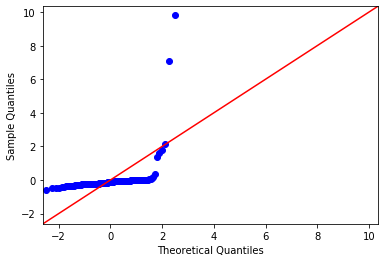

In [265]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### 8. Ensure homoscedasticity by checking for heteroscedasticity

#### Check for homoscedacity
Need to check that errors do not display heteroscedasticity; if the errors appear to increase or decrease based on the target variable, then the model does not meet the initial assumptions. Scatterplot of residual quantity on the x-axis against standard deviation on the y-axis.

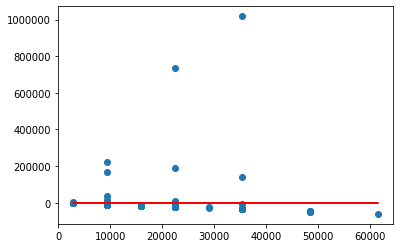

In [279]:
plt.scatter(predictions, model.resid)
plt.plot(predictions, [0 for i in range(len(x_train))], color = 'r')
plt.show()

___

# Primal Data

### 4. Train / Test Split Data

For train/test splits, as your dataset gets bigger and bigger, the split can lean more and more towards the "train" set. As your dataset gets really small (100 observations) then the split should be closer to 50/50 for train/test.

In [280]:
x_variables_1 = ['num_ingredients', 
              'pricePerServing', 
              'readyInMinutes', 
              'servings', 
              'weightWatcherSmartPoints', 
              'Calories', 
              'Fat', 
              'Saturated_Fat', 
              'Carbohydrates', 
              'Sugar', 
              'Cholesterol', 
              'Sodium', 
              'Protein', 
              'Vitamin_K', 
              'Vitamin_A', 
              'Vitamin_C', 
              'Manganese', 
              'Folate', 
              'Fiber', 
              'Copper', 
              'Magnesium', 
              'Phosphorus', 
              'Vitamin_B6', 
              'Potassium', 
              'Vitamin_B1', 
              'Iron', 
              'Vitamin_B2', 
              'Vitamin_E', 
              'Zinc', 
              'Vitamin_B5', 
              'Vitamin_B3', 
              'Calcium', 
              'Selenium', 
              'num_words_instructions', 
              'num_steps_instructions']

In [281]:
predictors_primal = primal[x_variables_1]

In [282]:
target = primal['aggregateLikes']

In [283]:
x_train, x_test, y_train, y_test = train_test_split(predictors_primal, target, random_state = 2020, test_size = .25) 

___

### 5. Run Regression 1, Fit, & Cull Non-Significant Predictors

### Lasso Model

In [284]:
lasso = Lasso(alpha = 0.05, max_iter=10000)
lasso.fit(x_train, y_train)
# sample_models['lasso'] = lasso
# y_lasso_test.append(lasso.score(X_test, y_test))

lasso_coefficients = dict(zip(x_variables, list(lasso.coef_)))
display('lasso coefficients')
display(lasso_coefficients)

display('lasso train score')
display(lasso.score(x_train, y_train))

display('lasso test score')
display(lasso.score(x_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325208304833.3384, tolerance: 179430234.31548488
  positive)


'lasso coefficients'

{'num_ingredients': -15036.041010180412,
 'pricePerServing': 11962.110864528537,
 'readyInMinutes': -2713.7351558479036,
 'servings': 25371.589572319728,
 'weightWatcherSmartPoints': -28229.489996786746,
 'Calories': -242050.80676089367,
 'Fat': 192592.86962241432,
 'Saturated_Fat': -12312.109954292662,
 'Carbohydrates': 108154.16957638114,
 'Sugar': 10581.001366190052,
 'Cholesterol': 27950.003540759022,
 'Sodium': 23874.57482412604,
 'Protein': 106219.99155562127,
 'Vitamin_K': -12384.448241244336,
 'Vitamin_A': -1195.9286324275297,
 'Vitamin_C': 56.785806005394036,
 'Manganese': 7956.136153407259,
 'Folate': -15624.657529456737,
 'Fiber': -8507.27865837874,
 'Copper': -10726.815837015649,
 'Magnesium': 2271.8491677697343,
 'Phosphorus': -1505.7281866607009,
 'Vitamin_B6': 1370.470655722378,
 'Potassium': 5384.815505357602,
 'Vitamin_B1': -8552.05964136358,
 'Iron': -52513.124024050754,
 'Vitamin_B2': -24153.067468740664,
 'Vitamin_E': -10115.684292122942,
 'Zinc': -4191.33602637216,

'lasso train score'

0.08668306211330812

'lasso test score'

-0.9535595006196667

### Ridge Model

In [285]:
ridge = Ridge(alpha = .05, max_iter= 10000)
ridge.fit(x_train, y_train)

ridge_coefficients = dict(zip(x_variables, list(ridge.coef_)))
display('ridge coefficients')
display(ridge_coefficients)

display('lasso train score')
display(ridge.score(x_train, y_train))

display('lasso test score')
display(ridge.score(x_test, y_test))

'ridge coefficients'

{'num_ingredients': -14582.74085397967,
 'pricePerServing': 12519.350341051844,
 'readyInMinutes': -2904.5760123119862,
 'servings': 24594.226947024967,
 'weightWatcherSmartPoints': -33646.74900896666,
 'Calories': -116939.20305213533,
 'Fat': 119278.81238865346,
 'Saturated_Fat': -12720.05834450052,
 'Carbohydrates': 52223.77596658767,
 'Sugar': 9120.077561187445,
 'Cholesterol': 26330.996342894457,
 'Sodium': 22600.07308595673,
 'Protein': 61557.447127610765,
 'Vitamin_K': -11831.835160192759,
 'Vitamin_A': -3234.385968652103,
 'Vitamin_C': 259.08129633023583,
 'Manganese': 8628.761592971663,
 'Folate': -16768.212293207263,
 'Fiber': -8555.273674929449,
 'Copper': -10514.32088918032,
 'Magnesium': 973.6259809039666,
 'Phosphorus': -1090.7053009314745,
 'Vitamin_B6': -693.3914450460342,
 'Potassium': 10334.392546165274,
 'Vitamin_B1': -6275.161335060635,
 'Iron': -50446.793683066666,
 'Vitamin_B2': -23243.03642755543,
 'Vitamin_E': -8590.07919689578,
 'Zinc': -2522.85102064305,
 'Vita

'lasso train score'

0.0858712236757232

'lasso test score'

-0.8630015153934698

### OLS Model

#### Regression 1 - fit to model, check for p-values less than 0.3

In [286]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
model = sm.OLS(y, x).fit() #assign to the x and y variables with constant to the sm.OLS() function and fit the data
predictions = model.predict(x)#assign the result of the OLS to predict the data
model.summary()#show the summary

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                 -0.161
Method:                 Least Squares   F-statistic:                    0.3498
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               1.00
Time:                        16:58:16   Log-Likelihood:                -2133.2
No. Observations:                 165   AIC:                             4338.
Df Residuals:                     129   BIC:                             4450.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5287.8075   3.48e+04     -0.152      0.880   -7.42e+04    6.36e+04
num_ingredients          -1.504e+04   1.44e+04     -1.042      0.300   -4.36e+04    1.35e+04
pricePerServing           1.196e+04   2.25e+04      0.532      0.595   -3.25e+04    5.64e+04
readyInMinutes           -2713.2240      1e+04     -0.270      0.788   -2.26e+04    1.72e+04
servings                  2.537e+04   1.83e+04      1.385      0.169   -1.09e+04    6.16e+04
weightWatcherSmartPoints -2.821e+04   6.34e+04     -0.445      0.657   -1.54e+05    9.72e+04
Calories                 -2.424e+05   3.74e+05     -0.648      0.518   -9.82e+05    4.97e+05
Fat                       1.928e+05    2.2e+05      0.877      0.382   -2.42e+05    6.28e+05
Saturated_Fat            -1.231e+04   4.06e+04     -0.303      0.762   -9.26e+04     6.8e+04
Carbohydrates             1.083e+05   1.74e+05      0.621      0.535   -2.37e+05    4.53e+05
Sugar                     1.059e+04   2.81e+04      0.376      0.707   -4.51e+04    6.62e+04
Cholesterol               2.795e+04   7.95e+04      0.352      0.726   -1.29e+05    1.85e+05
Sodium                    2.388e+04   2.35e+04      1.018      0.311   -2.25e+04    7.03e+04
Protein                   1.064e+05   1.55e+05      0.684      0.495   -2.01e+05    4.14e+05
Vitamin_K                -1.239e+04   1.48e+04     -0.835      0.405   -4.17e+04    1.69e+04
Vitamin_A                -1190.3877   1.55e+04     -0.077      0.939   -3.19e+04    2.96e+04
Vitamin_C                   56.0468   2.02e+04      0.003      0.998   -3.98e+04    3.99e+04
Manganese                 7954.3046   2.66e+04      0.299      0.766   -4.48e+04    6.07e+04
Folate                   -1.562e+04   2.52e+04     -0.620      0.536   -6.54e+04    3.42e+04
Fiber                    -8508.1577    3.5e+04     -0.243      0.808   -7.78e+04    6.08e+04
Copper                   -1.073e+04   1.02e+04     -1.053      0.294   -3.09e+04    9427.499
Magnesium                 2277.4303    4.9e+04      0.046      0.963   -9.47e+04    9.93e+04
Phosphorus               -1509.8583   6.26e+04     -0.024      0.981   -1.25e+05    1.22e+05
Vitamin_B6                1377.3978   5.24e+04      0.026      0.979   -1.02e+05    1.05e+05
Potassium                 5370.6391   4.53e+04      0.119      0.906   -8.42e+04     9.5e+04
Vitamin_B1               -8558.6017   4.52e+04     -0.189      0.850    -9.8e+04    8.09e+04
Iron                     -5.252e+04      9e+04     -0.583      0.561   -2.31e+05    1.26e+05
Vitamin_B2               -2.416e+04   4.04e+04     -0.598      0.551   -1.04e+05    5.58e+04
Vitamin_E                -1.012e+04   2.24e+04     -0.452      0.652   -5.44e+04    3.42e+04
Zinc                     -4196.7732   6.06e+04     -0.069      0.945   -1.24e+05    1.16e+05
Vitamin_B5    

#### Notes 
Keep num_ingredients, servings, and Copper. These are the only variables with a p-value lower than 0.3.

#### Regression 2 - fit to model, check for p-values less than 0.05

In [287]:
x_train = x_train[['num_ingredients', 'servings', 'Copper']]

In [288]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
model = sm.OLS(y, x).fit() #assign to the x and y variables with constant to the sm.OLS() function and fit the data
predictions = model.predict(x)#assign the result of the OLS to predict the data
model.summary()#show the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9587
Date:                Tue, 21 Jan 2020   Prob (F-statistic):              0.414
Time:                        16:58:17   Log-Likelihood:                -2139.2
No. Observations:                 165   AIC:                             4286.
Df Residuals:                     161   BIC:                             4299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.913e+04   9978.124      1.918      0.057    -571.794    3.88e+04
num_ingredients -6157.9083    1.1e+04     -0.558      0.578    -2.8e+04    1.57e+04
servings         1.831e+04   1.18e+04      1.549      0.123   -5032.759    4.17e+04
Copper          -5477.8831   7000.871     -0.782      0.435   -1.93e+04    8347.494
==============================================================================
Omnibus:                      276.972   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32873.918
Skew:                           7.905   Prob(JB):                         0.00
Kurtosis:                      70.318   Cond. No.                         2.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Notes 
Keep servings - this is the only variable with the lowest p-value.

#### Regression 3 - fit to model with only 1 variable remaining

In [289]:
x_train = x_train[['servings']]

In [290]:
x = x_train #predictor variables
y = y_train #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
model = sm.OLS(y, x).fit() #assign to the x and y variables with constant to the sm.OLS() function and fit the data
predictions = model.predict(x)#assign the result of the OLS to predict the data
model.summary()#show the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         aggregateLikes   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.003
Date:                Tue, 21 Jan 2020   Prob (F-statistic):              0.159
Time:                        16:58:18   Log-Likelihood:                -2139.7
No. Observations:                 165   AIC:                             4283.
Df Residuals:                     163   BIC:                             4290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.206e+04   8505.387      2.593      0.010    5260.579    3.89e+04
servings    1.629e+04   1.15e+04      1.415      0.159   -6438.109     3.9e+04
==============================================================================
Omnibus:                      279.510   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34470.536
Skew:                           8.028   Prob(JB):                         0.00
Kurtosis:                      71.964   Cond. No.                         1.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. QQ-Plot check for normally distributed residuals

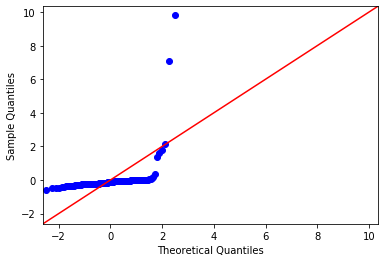

In [291]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### 8. Ensure homoscedasticity by checking for heteroscedasticity

#### Check for homoscedacity
Need to check that errors do not display heteroscedasticity; if the errors appear to increase or decrease based on the target variable, then the model does not meet the initial assumptions. Scatterplot of residual quantity on the x-axis against standard deviation on the y-axis.

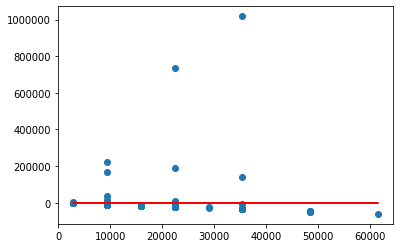

In [293]:
plt.scatter(predictions, model.resid)
plt.plot(predictions, [0 for i in range(len(x_train))], color = 'r')
plt.show()